### 2.1.2 编写hello world程序演示session的使用

In [1]:
import tensorflow as tf
# tf.constant定义的是一个常量，hello的内容只有在session的run内才可以返回
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(hello)
print(sess.run(hello))
sess.close()

Tensor("Const:0", shape=(), dtype=string)
b'Hello, TensorFlow!'


### 2.1.3 演示with session的作用

In [2]:
import tensorflow as tf
a = tf.constant(3)
b = tf.constant(4)
with tf.Session() as sess:
    print('相加:{}'.format(sess.run(a+b)))
    print('相乘:{}'.format(sess.run(a*b)))

相加:7
相乘:12


### 2.1.4 演示注入机制

In [3]:
import tensorflow as tf
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.multiply(a, b)
with tf.Session() as sess:
    print('相加:{}'.format(sess.run(add, feed_dict={a:3, b:4})))
    print('相乘:{}'.format(sess.run(mul, feed_dict={a:3, b:4})))

相加:7
相乘:12


### 2.1.6 使用注入机制获取节点

In [4]:
import tensorflow as tf
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add = tf.add(a, b)
mul = tf.multiply(a, b)
with tf.Session() as sess:
    print(sess.run([add, mul], feed_dict={a:3, b:4})) # 一次获取多个节点的值

[7, 12]


### 2.1.9 保存和载入模型的方法的介绍

In [5]:
# 保存模型
...# 首先构建模型graph的操作
# saver = tf.train.Saver() # 生成saver
# with tf.Session as sess:
#    sess.run(tf.global_variable_initializer()) # 对模型进行初始化
...# 将数据注入模型进行训练
# 使用saver.save进行保存
# saver.save(sess, 'save_path/file_name')

Ellipsis

In [6]:
# 载入模型
# saver = tf.train.Saver()
# with tf.Session as sess:
#   sess.run(tf.global_variables_initializer())
#   sess.restore(sess, 'save_path/file_name')

### 2.1.10 保存/载入线性回归模型

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

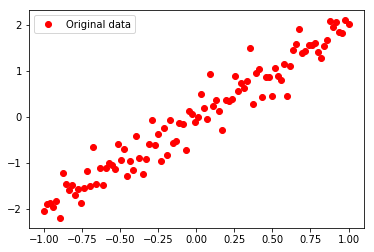

In [8]:
# 创建模拟数据
train_x = np.linspace(-1, 1, 100)
train_y = 2 * train_x + np.random.randn(*train_x.shape) * 0.3 # y=2x, 但加入了噪声
plt.plot(train_x, train_y, 'ro', label='Original data' )
plt.legend()

In [9]:
# 正向搭建模型
# 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 模型参数
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.zeros([1], name='bias'))
# 前向结构
z = tf.multiply(W, X) + b

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# 反向搭建模型
# 损失函数
cost = tf.reduce_mean(tf.square(Y-z))
# 学习率
learning_rate = 0.01
# 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [11]:
# 初始化所有变量
init = tf.global_variables_initializer()
# 生成saver和模型保存路径
saver = tf.train.Saver()
savedir = 'log/'
# 定义参数
training_epochs = 20 # 迭代次数
# 启动session
with tf.Session() as sess:
    sess.run(init)
    # 向模型输入数据并训练模型
    for epoch in range(training_epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
    print('Finished!')
    print('cost=', sess.run(cost, feed_dict={X:train_x, Y:train_y}), 
          'w=', sess.run(W), 'b=', sess.run(b))
    # 保存模型
    saver.save(sess, savedir+'linear_model.cpkt')
    

Finished!
cost= 0.08153944 w= [1.9949186] b= [0.00464372]


In [12]:
# 重启一个session并命名为sess2，在其中使用saver的restore函数载入模型
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, savedir+'linear_model.cpkt')
    print('x=0.2, z=', sess2.run(z, feed_dict={X: 0.2}))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from log/linear_model.cpkt
x=0.2, z= [0.40362743]


### 2.1.11 分析模型内容，演示模型保存的其他方法

In [13]:
# 模型内容
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
savedir = 'log/'
# tensor_name 后面是创建的变量名，接着是它的数值
print_tensors_in_checkpoint_file(savedir+'linear_model.cpkt',None,True)

tensor_name:  Variable
[0.00464372]
tensor_name:  weight
[1.9949186]


### 2.1.13 为模型添加保存检查点

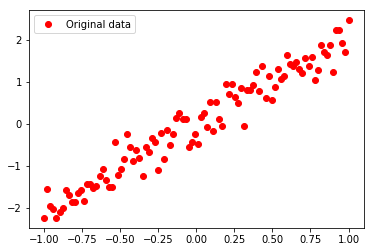

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 定义生成loss可视化的函数
plotdata = {'batch_num':[], 'loss':[]}

# 定义滑动平均函数
def moving_average(a, w=10):
    if len(a) < 10:
        return a[:]
    return [val if idx < w else sum(a[(idx - w):idx]) / w for idx, val in enumerate(a)]

# 生成模拟数据
train_x = np.linspace(-1, 1, 100)
train_y = 2 * train_x + np.random.randn(*train_x.shape)*0.3 # y=2x 但加入了噪声

# 图形显示
plt.plot(train_x, train_y, 'ro', label='Original data')
plt.legend()
plt.show()

In [15]:
tf.reset_default_graph() # 清除默认图形堆栈并重置全局默认图形

Epoch: 1 cost= 0.56186587 W= [0.91501194] b= [0.13890307]
Epoch: 3 cost= 0.1417129 W= [1.7292371] b= [0.12415772]
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch: 5 cost= 0.09107463 W= [1.9721569] b= [0.03594819]
Epoch: 7 cost= 0.08699996 W= [2.035514] b= [0.01171957]
Epoch: 9 cost= 0.086581364 W= [2.0519052] b= [0.00543094]
Epoch: 11 cost= 0.08651573 W= [2.0561428] b= [0.00380475]
Epoch: 13 cost= 0.086501606 W= [2.0572386] b= [0.0033843]
Epoch: 15 cost= 0.086498134 W= [2.057523] b= [0.00327521]
Epoch: 17 cost= 0.08649725 W= [2.0575957] b= [0.00324731]
Epoch: 19 cost= 0.08649704 W= [2.057614] b= [0.00324019]
Finished!
cost= 0.086497 W= [2.0576172] b= [0.00323901]


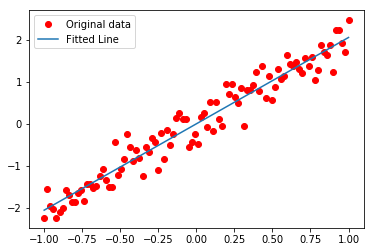

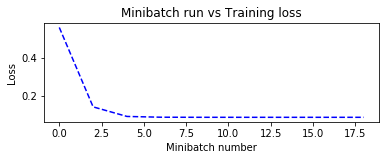

INFO:tensorflow:Restoring parameters from log/linear_model.cpkt-18
x=0.2, z= [0.41476303]


In [16]:
# 创建模型
# 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 模型参数
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# 前向结构
z = tf.multiply(X, W)+b

# 反向优化
cost = tf.reduce_mean(tf.square(Y-z))
learning_rate=0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 初始化所有变量
init = tf.global_variables_initializer()
# 定义学习参数
training_epochs=20
display_step=2
saver = tf.train.Saver(max_to_keep=1) # 迭代过程中只保存一个文件
                                      # 在循环训练过程中新生成的模型会覆盖之前的模型
# 启动图
with tf.Session() as sess:
    sess.run(init) # 初始化所有变量
    # 向模型中输入数据并进行训练
    for epoch in range(training_epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print('Epoch:',epoch+1, 'cost=',loss, 'W=', sess.run(W), 'b=', sess.run(b) )
            if not (loss=='NA'):
                plotdata['batch_num'].append(epoch)
                plotdata['loss'].append(loss)
            saver.save(sess, savedir+'linear_model.cpkt', global_step=epoch)
    print('Finished!')
    print('cost=', sess.run(cost, feed_dict={X:train_x, Y:train_y}), 'W=', sess.run(W), 'b=', sess.run(b))
    # 显示模型
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W) * train_x + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()
    
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batch_num'], plotdata['avgloss'], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs Training loss')
    plt.show()
    
# 重启一个session， 载入检查点
load_epoch=18
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, savedir+'linear_model.cpkt-'+str(load_epoch))
    print('x=0.2, z=', sess2.run(z, feed_dict={X:0.2}))

In [17]:
# 快速获取到检查点文件
#ckpt = tf.train.get_checkpoint_state(spkt_dir)
#if ckpt and ckpt.model_checkpoint_path:
#    saver,restore(sess, ckpt.model_checkpoint_path)

In [18]:
# 更简洁的写法
#kpt = tf.train.latest_checkpoint(savedir)
#    if kpt != None:
#       saver.restore(sess, kpt)

### 2.3.3 演示get_variable 和Variable的区别

In [19]:
# Variable的用法
import tensorflow as tf

var1 = tf.Variable(1.0, name='firstvar')
print('var1:', var1.name)
var1 = tf.Variable(2.0, name='firstvar') # 内存中生成了两个var1，但只有之后的var1生效
# name属性重复系统自动编号进行区分
print('var1:', var1.name)

var1: firstvar:0
var1: firstvar_1:0


In [20]:
var2 = tf.Variable(3.0) # 为var2分配系统默认的name属性—Variable:0
print('var2:',var2.name)
var2 = tf.Variable(4.0)
print('var2:', var2.name)

var2: Variable:0
var2: Variable_1:0


In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('var1=', var1.eval())
    print('var2=', var2.eval())
    
    # get_variable一般会配合variable_scope一起使用，以实现共享变量
    # get_variable用法演示
    # get_variable和Variable的区别
    get_var1=tf.get_variable(name='firstvar', shape=[1], initializer=tf.constant_initializer(0.3))
    print('get_var1:', get_var1.name)
    
    #get_var1=tf.get_variable(name='firstvar', shape=[1], initializer=tf.constant_initializer(0.4)) 
    #ValueError 
    # 使用get_variable只能定义一次指定名称的变量，不能创建两个相同名字的变量

var1= 2.0
var2= 4.0
get_var1: firstvar_2:0


### 在特定作用域下获取变量

In [22]:
# 在作用域下，使用get_variable，以及嵌套variable_scope
# 在同一作用域内，不能使用get_variable创建两个同样的名字。可以使用variable_scope将同名变量名分隔

import tensorflow as tf
with tf.variable_scope('test1',): # 定义一个作用域test1
    var1 = tf.get_variable('firstvar', shape=[2], dtype=tf.float32)
with tf.variable_scope('test2',): 
    var2 = tf.get_variable('firstvar', shape=[2], dtype=tf.float32)

print('var1:', var1.name) # 通过输出可以看出，生成的var1和var2作用在不同的scope下
print('var2:', var2.name)

var1: test1/firstvar:0
var2: test2/firstvar:0


In [23]:
# variable_scope支持嵌套
with tf.variable_scope('test_1',):
    var_1 = tf.get_variable('firstvar', shape=[2], dtype=tf.float32)
    with tf.variable_scope('test_2',):
        var_2 = tf.get_variable('firstvar', shape=[2], dtype=tf.float32)
print('var_1:', var_1.name)
print('var_2:', var_2.name)

var_1: test_1/firstvar:0
var_2: test_1/test_2/firstvar:0


### 2.3.5 共享变量功能的实现

In [24]:
# get_variable的主要功能是实现 共享变量
# variable_scope里面有一个reuse=True 属性，表示使用已经定义过的变量
# get_variable将不会再创建新的变量，而是去图中get_variable所创建变量中找与name相同的变量

with tf.variable_scope('test1', reuse=True):
    var3 = tf.get_variable('firstvar', shape=[2], dtype=tf.float32)
    with tf.variable_scope('test2'):
        var4 = tf.get_variable('firstvar', shape=[2], dtype=tf.float32)

print('var3:',var3.name)
print('var4:',var4.name)

ValueError: Variable test1/test2/firstvar does not exist, or was not created with tf.get_variable(). Did you mean to set reuse=tf.AUTO_REUSE in VarScope?